In [16]:
# Python Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as skm
from sklearn import metrics
from collections import Counter


In [17]:
# Read data from csv file
dfCSV = pd.read_csv("C:/Users/princ/Desktop/GROUP - EDA/1-trainKFold1.csv")


In [18]:
# Data Slicing
x = dfCSV.iloc[:, 1:18]
y = dfCSV.loc[:, ['Which method of online learning do you prefer?']]


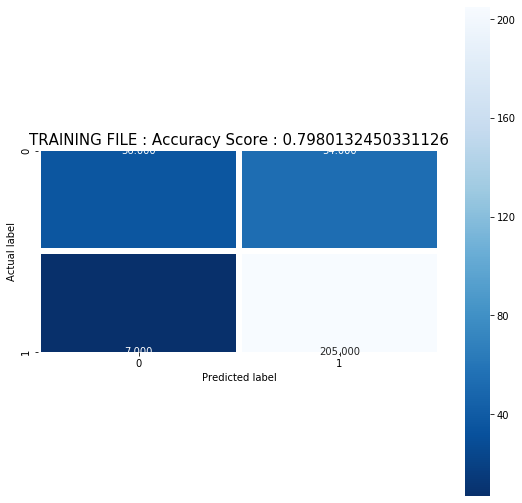

In [19]:
# Machine Learning : Classfication
# Convert dataframe to array
x = x.values
y = y.values
y = y.ravel()

# >>K-Nearest Neighbor
model = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30, # range(1-50)
                            metric='minkowski',
                            metric_params=None,
                            n_jobs=None,
                            n_neighbors=5, # Group Default n=7 range(1-30)
                            p=1, # Group Default p=2 range(1-2)
                            weights='uniform')

model.fit(x, y)
yPred = model.predict(x)

# >>Testing & Performance analysis - Training Data
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True,
           fmt='.3f', linewidths=5, square=True,
           cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'TRAINING FILE : Accuracy Score : {0}'.format(skm.accuracy_score(y, yPred))
plt.title(all_sample_title, size=15);


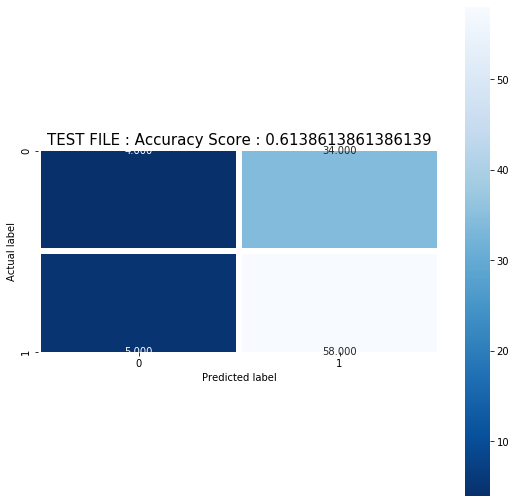

In [20]:
# >>Testing and Performance analysis - Test Data
df2 = pd.read_csv("C:/Users/princ/Desktop/GROUP - EDA/1-testKFold1.csv")

#Data Slicing
x2 = df2.iloc[:, 1:18]
y2 = df2.loc[:, ['Which method of online learning do you prefer?']]

yPred2 = model.predict(x2)

# >>Seaborn #Run at new python 3
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True,
           fmt='.3f', linewidths=5, square=True,
           cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'TEST FILE : Accuracy Score : {0}'.format(skm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size=15);
